In [ ]:
# Importing Libraries

from imageio import imread
from PIL import Image
import imageio 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

from PIL import Image, ImageEnhance
%matplotlib inline 

import cv2 # for openCV

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Crowd_images/img1.jpg', 0)
image2 = cv2.imread('/content/drive/MyDrive/Crowd_images/49.png', 0)
image3 = cv2.imread('/content/drive/MyDrive/Crowd_images/12.png', 0)
image4 = cv2.imread('/content/drive/MyDrive/Crowd_images/49.png', 0)
image5 = cv2.imread('/content/drive/MyDrive/Crowd_images/img5.jpg', 0)
image6 = cv2.imread('/content/drive/MyDrive/Crowd_images/img6.jpg', 0)
image7 = cv2.imread('/content/drive/MyDrive/Crowd_images/img7.jpg', 0)
image8 = cv2.imread('/content/drive/MyDrive/Crowd_images/img8.jpg', 0)
image9 = cv2.imread('/content/drive/MyDrive/Crowd_images/img9.jpg', 0)
image10 = cv2.imread('/content/drive/MyDrive/Crowd_images/img10.jpg', 0)

In [ ]:
def preview(image_set, titles, figsize): # This is fucntion to preview all images before processing
    
    for p in range(len(image_samples)):
        plt.figure(figsize = (figsize,figsize)) 
        plt.subplot(5,2,p+1)
        plt.imshow(image_samples[p],'gray')
        plt.title(titles[p])
        plt.xticks([]),plt.yticks([])
def crop(image, start_y, end_y, start_x, end_x): # To crop the image
       
    img_cropped = image[start_y:end_y, start_x:end_x]
    
    return img_cropped
def resize(image, width, height): # To resize the image

    img_resized = cv2.resize(image,(width,height))

    return img_resized

def gamma_correction(image, y): # To control the overall brightness of an image
    
    gamma_correct = np.array(255 * (image / 255) ** y , dtype='uint8')
    
    return gamma_correct

def apply_threshold(image): # For object segmenting, this changes the pixels to make the image easier to analyze
    thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 255, 19)
    thresh = cv2.bitwise_not(thresh)
    return thresh

def dilation_erosion(image): # Adding and removing pixels in the image to smoothen out the shape
    
    kernel = np.ones((15,15), np.uint8)
    img_dilation = cv2.dilate(image, kernel, iterations=1)
    img_erode = cv2.erode(img_dilation,kernel, iterations=1)

    # clean all noise after dilatation and erosion
    img_erode = cv2.medianBlur(img_erode, 7)
    
    return img_erode

def labeling(image_set): 
    total = 0
    num_images = len(image_set)
    rows = int(np.sqrt(num_images)) + 1
    cols = int(num_images / rows) + 1
    fig = plt.figure(figsize=(22, 24))
    for i in range(num_images):
        image = image_set[i]
        ret, labels = cv2.connectedComponents(image)
        label_hue = np.uint8(179 * labels / np.max(labels))
        blank_ch = 255 * np.ones_like(label_hue)
        labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
        labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
        labeled_img[label_hue == 0] = 0
        count = str(ret-1)
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title('count: '+ count)
        ax.imshow(image)
        total = total + int(count)
    plt.show()
    print("Total people count:", total)
def plotting(image_set, titles, rows, cols, figsize):
    
    for i in range(len(images)):
        plt.figure( figsize = (figsize,figsize) )
        plt.subplot(rows, cols, i+1)
        
        plt.imshow(images[i],'gray')
        plt.title(titles[i])

def get_crop_params(img_height, img_width, num_rows, num_cols):
    row_height = img_height // num_rows
    col_width = img_width // num_cols
    crop_params = []
    for i in range(num_rows):
        for j in range(num_cols):
            x1 = j * col_width
            y1 = i * row_height
            x2 = x1 + col_width
            y2 = y1 + row_height
            crop_params.append((y1, y2, x1, x2))
    return crop_params
def split_and_resize_image(image, crop_params, resize_multiplier):
    cropped_images = []
    resized_images = []

    for params in crop_params:
        cropped = crop(image, *params)
        cropped_images.append(cropped)
        
        resized = resize(cropped, cropped.shape[1]*resize_multiplier, cropped.shape[0]*resize_multiplier)
        resized_images.append(resized)
        
    return cropped_images, resized_images


In [ ]:
images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10]
titles = ['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5', 'Image 6', 'Image 7', 'Image 8', 'Image 9', 'Image 10']

# plotting(images, titles, 5, 2, 18)

# print("Image size for all images (height, width):", (image5.shape))

In [ ]:

image = image4
resize_multiplier = 2
num_rows = int(input())
num_cols = int(input())

image_width = image.shape[1]
image_height = image.shape[0]

crop_params = get_crop_params(image_height, image_width, num_rows,num_cols)
cropped_images, resized_images = split_and_resize_image(image, crop_params, resize_multiplier)

5
5


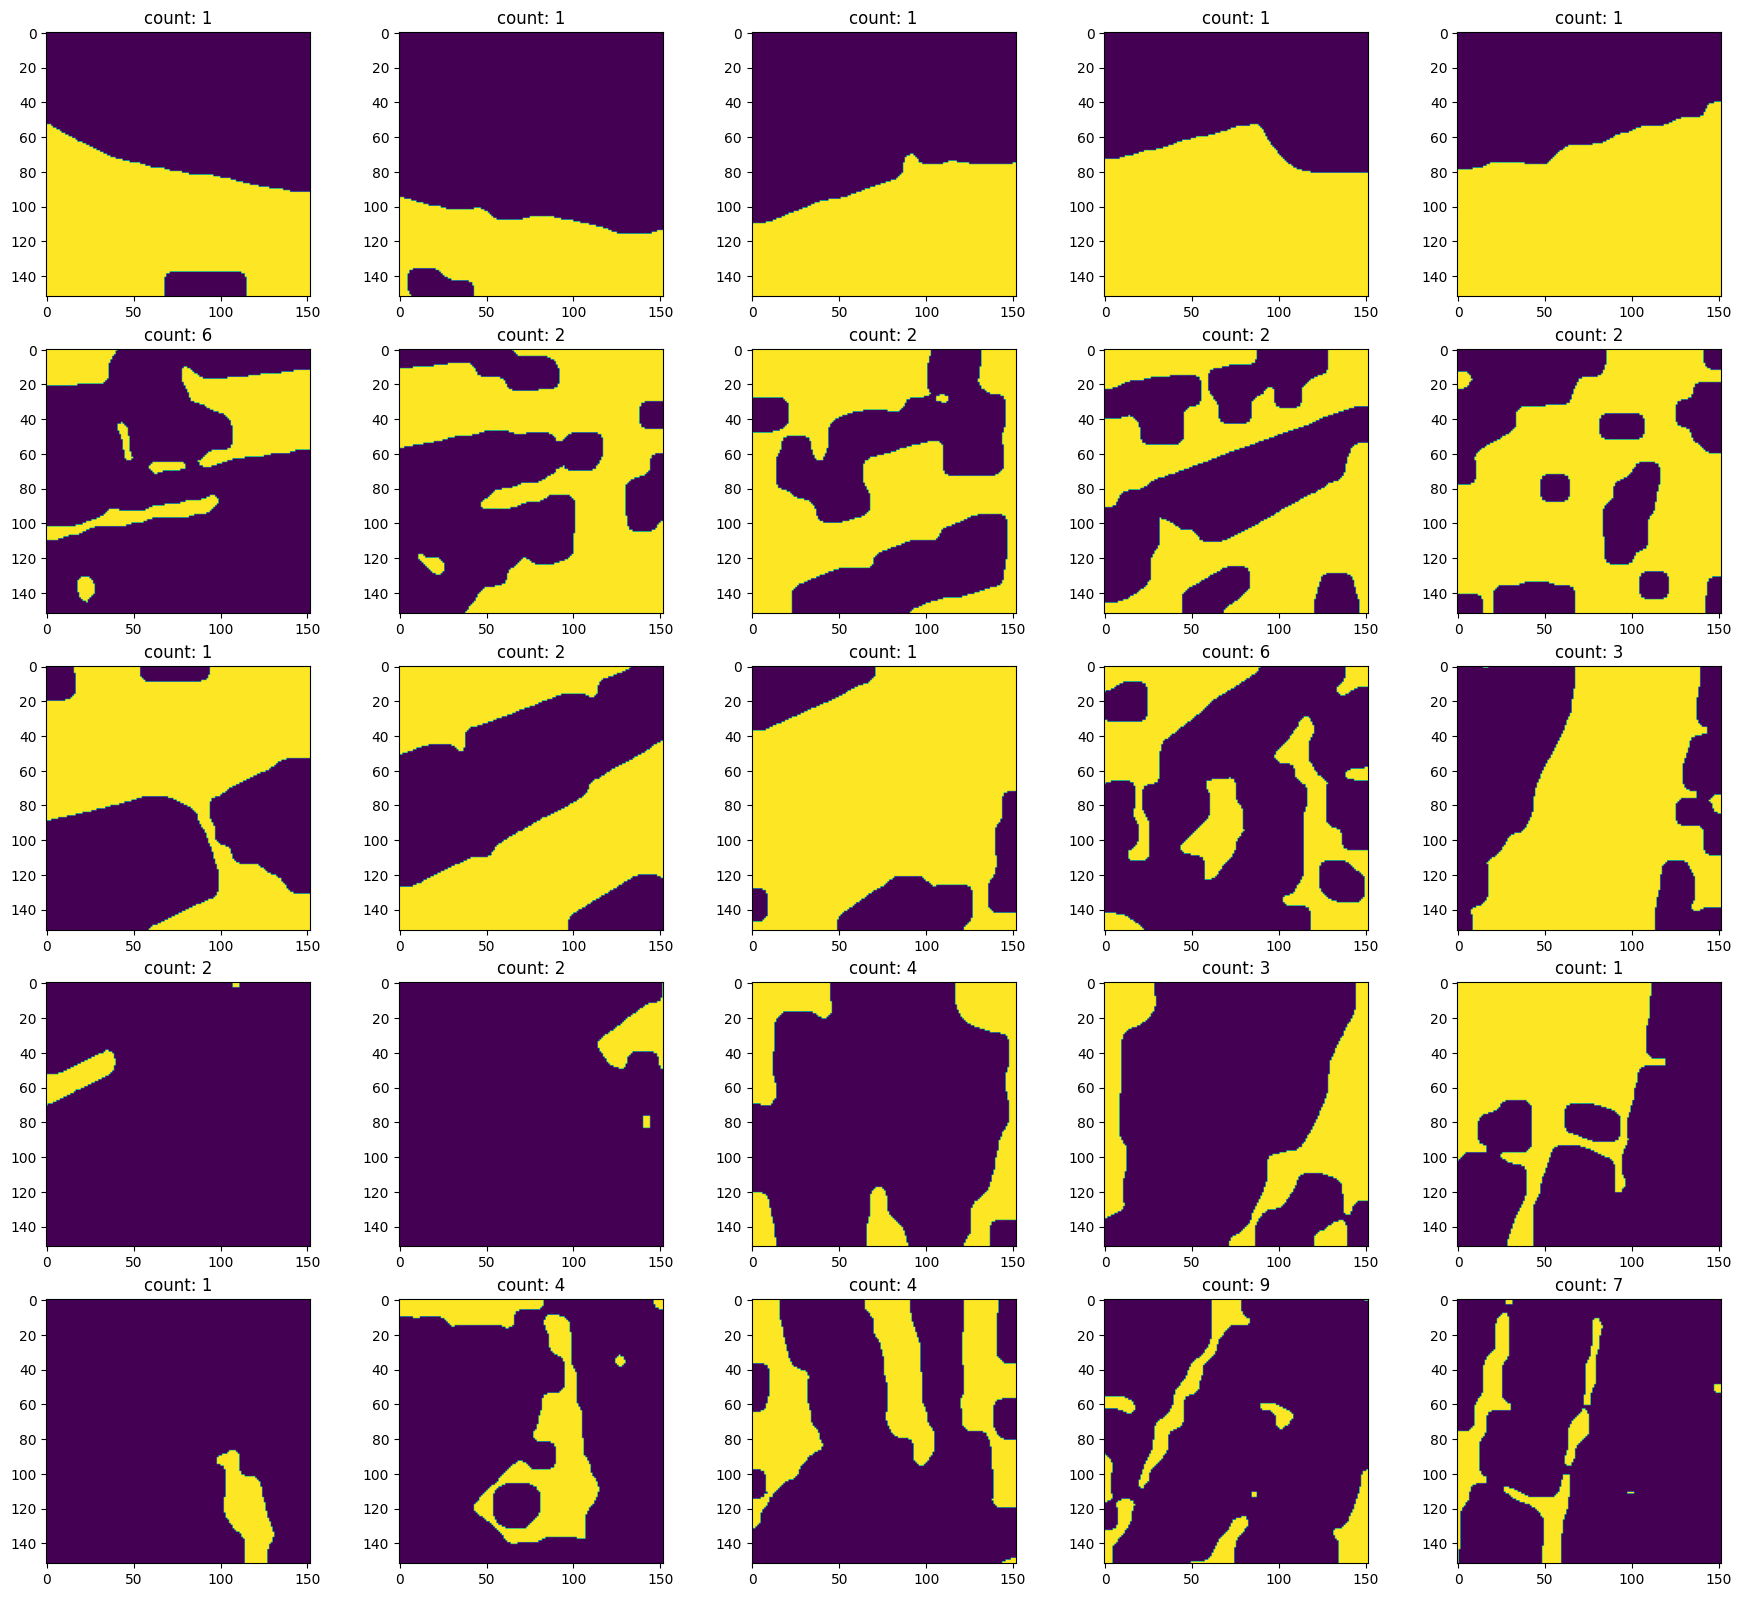

Total people count: 69


In [ ]:
gamma = []
for img in resized_images:
    gamma_img = gamma_correction(img, 2)
    gamma.append(gamma_img)

thresholded_images = []
for img in gamma:
    thresholded = apply_threshold(img)
    thresholded_images.append(thresholded)

dilation_images = []
for img in thresholded_images:
     dilation_img = dilation_erosion(img)
     dilation_images.append(dilation_img)

images = dilation_images

labeling(images)